In [8]:
import numpy as np
import pandas as pd

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'png'

In [2]:
df = pd.read_csv('../../../data/telecom_churn.csv')

In [3]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [4]:
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [6]:
X.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

CPU times: user 32.4 s, sys: 550 ms, total: 33 s
Wall time: 32.7 s


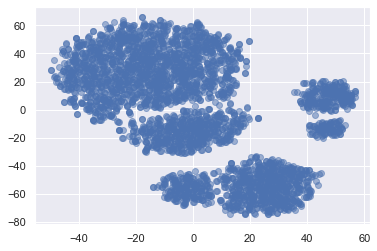

In [10]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5);

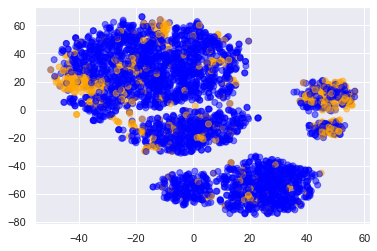

In [11]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c=df['Churn'].map({False: 'blue', True: 'orange'}), alpha=.5);